In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Load Dataset
df = pd.read_csv("diamonds.csv")
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
df.isnull().sum()


carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
volume        0
log_carat     0
log_volume    0
cluster       0
dtype: int64

In [13]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


((53940, 10), None)

In [ ]:
#Data Cleaning
#(Diamonds with zero dimensions are invalid, so they are replaced with median values)
for col in ['x', 'y', 'z']:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())


In [ ]:
#Feature Engineering
     #Create volume feature

df['volume'] = df['x'] * df['y'] * df['z']
df['volume']

0         38.202030
1         34.505856
2         38.076885
3         46.724580
4         51.917250
            ...    
53935    115.920000
53936    118.110175
53937    114.449728
53938    140.766120
53939    124.568444
Name: volume, Length: 53940, dtype: float64

In [ ]:
     #Log transformation to reduce skewness
df['log_carat'] = np.log1p(df['carat'])
df['log_volume'] = np.log1p(df['volume'])


In [ ]:
# Encoding Categorical Variables
#(Ordinal encoding is used as categories have natural order)

cut_map = {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4}
color_map = {"D":0,"E":1,"F":2,"G":3,"H":4,"I":5,"J":6}
clarity_map = {"I1":0,"SI2":1,"SI1":2,"VS2":3,"VS1":4,"VVS2":5,"VVS1":6,"IF":
7}
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)


In [21]:
df['cut']
#df['color'] 
#df['clarity'] 

0        4
1        3
2        1
3        3
4        1
        ..
53935    4
53936    1
53937    2
53938    3
53939    4
Name: cut, Length: 53940, dtype: int64

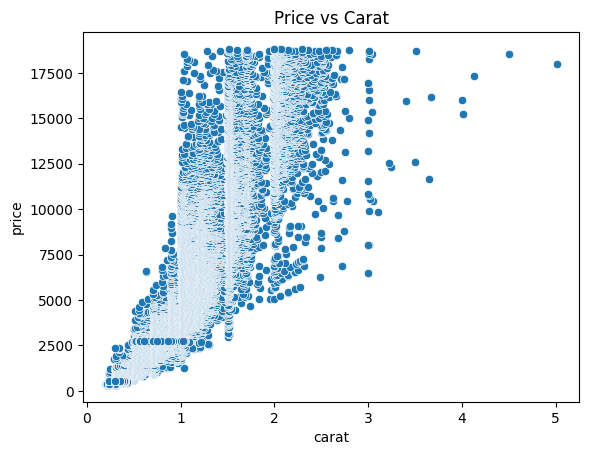

In [ ]:
#Exploratory Data Analysis

sns.scatterplot(x=df['carat'], y=df['price'])
plt.title("Price vs Carat")
plt.show()


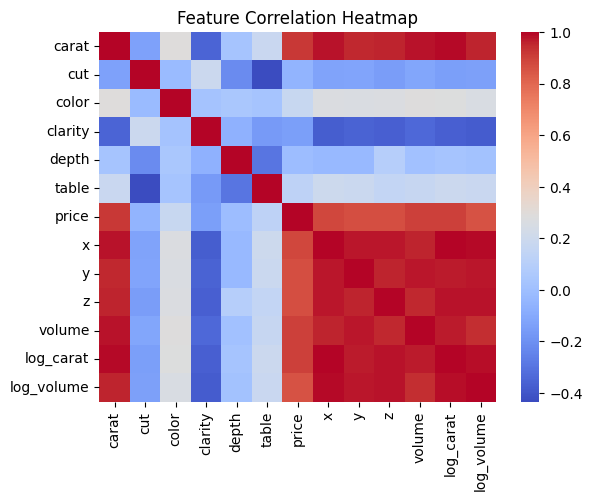

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Feature Selection
features = [
'carat','cut','color','clarity',
'depth','table','volume',
'log_carat','log_volume'
]
X = df[features]
y = df['price']

X

,carat,cut,color,clarity,depth,table,volume,log_carat,log_volume
0,0.23,4,1,1,61.5,55.0,38.202030,0.207014,3.668729
1,0.21,3,1,2,59.8,61.0,34.505856,0.190620,3.569698
2,0.23,1,1,4,56.9,65.0,38.076885,0.207014,3.665531
3,0.29,3,5,3,62.4,58.0,46.724580,0.254642,3.865447
4,0.31,1,6,1,63.3,58.0,51.917250,0.270027,3.968729
...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,115.920000,0.542324,4.761490
53936,0.72,1,0,2,63.1,55.0,118.110175,0.542324,4.780049
53937,0.70,2,0,2,62.8,60.0,114.449728,0.530628,4.748835
53938,0.86,3,4,1,61.0,58.0,140.766120,0.620576,4.954179


In [27]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test

(       carat  cut  color  clarity  depth  table      volume  log_carat  \
 26546   2.01    1      2        1   58.1   64.0  321.515649   1.101940   
 9159    1.01    2      1        1   60.0   60.0  167.146056   0.698135   
 14131   1.10    3      4        3   62.5   58.0  176.704260   0.741937   
 15757   1.50    1      1        1   61.5   65.0  228.494994   0.916291   
 24632   1.52    2      3        4   62.1   57.0  241.070292   0.924259   
 ...      ...  ...    ...      ...    ...    ...         ...        ...   
 11284   1.05    2      5        3   62.4   59.0  170.848440   0.717840   
 44732   0.47    4      0        4   61.0   55.0   77.112918   0.385262   
 38158   0.33    2      2        7   60.3   58.0   54.068580   0.285179   
 860     0.90    3      6        2   62.8   59.0  141.202098   0.641854   
 15795   1.14    3      2        2   60.4   58.0  190.325058   0.760806   
 
        log_volume  
 26546    5.776152  
 9159     5.124833  
 14131    5.180121  
 15757    5.43

In [47]:
print(X_train.shape, X_test.shape)


(43152, 9) (10788, 9)


In [ ]:
#Model 1: Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [34]:
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


MAE: 797.665498716035
RMSE: 1198.04253167614
R2: 0.909711138663431


In [ ]:
#Model 2: Random Forest Regressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [36]:
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

MAE: 276.2366906757936
RMSE: 545.8917404648379
R2: 0.9812542530454025


In [48]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,797.665499,1198.042532,0.909711
1,Random Forest,276.236691,545.891740,0.981254


In [ ]:
# Save Price Model

pickle.dump(rf, open("price_model.pkl", "wb"))


In [ ]:
#Market Segmentation using KMeans
       #Scaling features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


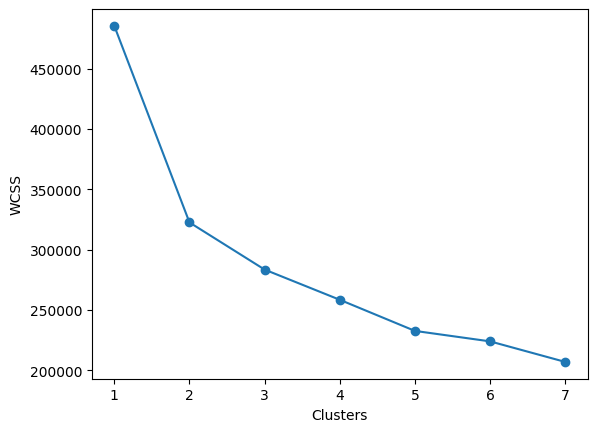

In [ ]:
      #Elbow method
wcss = []
for k in range(1, 8):
 km = KMeans(n_clusters=k, random_state=42)
 km.fit(X_scaled)
 wcss.append(km.inertia_)
 
plt.plot(range(1,8), wcss, marker='o')
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()


In [56]:
#Final clustering

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [57]:
df['cluster'].value_counts()

cluster
1    25146
2    20429
0     8365
Name: count, dtype: int64

In [53]:
### Cluster Interpretation
#- Cluster 0: Budget diamonds
#- Cluster 1: Mid-range diamonds
#- Cluster 2: Premium diamonds


In [58]:
#Save Clustering Models

pickle.dump(kmeans, open("cluster_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
